# Generalized Canonical Correlation Analysis (GCCA)

In [23]:
from mvlearn.datasets import load_UCImultifeature
from mvlearn.embed import GCCA
from mvlearn.plotting import crossviews_plot
from graspy.plot import pairplot

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load Data
We load three views from the UCI handwritten digits multi-view data set. Specificallym the Profile correlations, Karhunen-Love coefficients, and pixel averages from 2x3 windows.

In [92]:
# Load full dataset, labels not needed
Xs, y = load_UCImultifeature()
Xs = [Xs[1], Xs[2], Xs[3]]

In [93]:
# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')

There are 3 views.
There are 2000 observations
The feature sizes are: [216, 64, 240]


### Embed Views

In [94]:
# Create GCCA object and embed the 
gcca = GCCA()
Xs_latents = gcca.fit_transform(Xs)

In [95]:
print(f'The feature sizes are: {[X.shape[1] for X in Xs_latents]}')

The feature sizes are: [5, 5, 5]


## Plot the first two views against each other
The top three dimensions from the latents spaces of the profile correlation and pixel average views are plotted against each other. However, their latent spaces are influenced the the Karhunen-Love coefficients, not plotted.

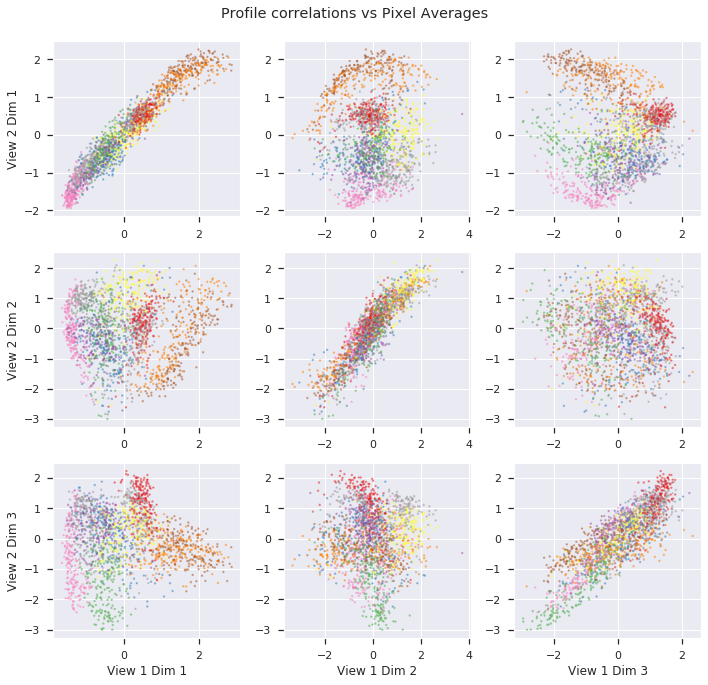

In [106]:
crossviews_plot(Xs_latents[[0,2]], dimensions=[0,1,2], labels=y, cmap='Set1', title=f'Profile correlations vs Pixel Averages', scatter_kwargs={'alpha':0.4, 's':2.0})